In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

# Paso 2: Entendimiento de los Datos

## Entendiemiento del Dataset de Calificaciones de estudiantes

### Exploración Inicial de los Datos

En esta fase, nos enfocamos en explorar los datos disponibles para comprender su estructura, contenido y calidad. El dataset que hemos obtenido contiene las siguientes columnas:

- **Sede**: Valor categórico que representa el nombre de la sede del colegio.
- **Estudiante**: Nombre completo del estudiante.
- **Documento de identidad**: Número de documento de identidad del estudiante.
- **Grado**: Nivel de escolaridad del estudiante (por ejemplo, 1º, 2º, 3º, etc.).
- **Grupo**: Identificador del grupo al que pertenece el estudiante dentro de su grado.
- **Periodo**: Periodo académico en el que se registraron las calificaciones.
- **Año**: Año en el que se registraron los datos.
- **Intensidad Horaria**: Número de horas dedicadas a la asignatura.
- **Asignatura**: Nombre de la asignatura que está siendo evaluada.
- **Cognitiva**: Calificación obtenida por el estudiante en la dimensión cognitiva.
- **Procedimental**: Calificación obtenida por el estudiante en la dimensión procedimental.
- **Actitudinal**: Calificación obtenida por el estudiante en la dimensión actitudinal.
- **Axiológica**: Calificación obtenida por el estudiante en la dimensión axiológica.

A continuación, procederemos a explorar estos datos en detalle para entender mejor su estructura y evaluar su calidad.

### Análisis Exploratorio de los Datos

- Cargar el archivo Excel

In [5]:

# Cargar el archivo Excel
url = '../data/calificaciones/Calificaciones-2023-2024-old.csv'
calificaciones_df = pd.read_csv(url)
calificaciones_df.head()


,Sede,Estudiante,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
0,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Naturales,100,96,96,NaN
1,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Sociales,100,96,96,NaN
2,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Matemáticas,100,100,98,NaN
3,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Lectoescritura,100,100,98,NaN
4,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Inglés,98,97,98,NaN


- Exploramos la estructura del DataFrame (nombre de columnas, tipos de datos y valores nulos)

In [218]:
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24944 entries, 0 to 24943
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    24944 non-null  object 
 1   Estudiante              24944 non-null  object 
 2   Documento de identidad  24944 non-null  object 
 3   Grado                   24944 non-null  object 
 4   Grupo                   24944 non-null  object 
 5   Periodo                 24944 non-null  object 
 6   Año                     24944 non-null  int64  
 7   Intensidad Horaria      22045 non-null  float64
 8   Asignatura              24944 non-null  object 
 9   Cognitiva               24944 non-null  int64  
 10  Procedimental           24944 non-null  int64  
 11  Actitudinal             24944 non-null  int64  
 12  Axiologica              22045 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 2.5+ MB


- Se verifica la cantidad de valores null

In [219]:
#se verifica la cantidad de valores null
calificaciones_df.isnull().sum()

Sede                         0
Estudiante                   0
Documento de identidad       0
Grado                        0
Grupo                        0
Periodo                      0
Año                          0
Intensidad Horaria        2899
Asignatura                   0
Cognitiva                    0
Procedimental                0
Actitudinal                  0
Axiologica                2899
dtype: int64

### Conversiones a Realizar
- **Columna `Estudiante`**: Convertida a tipo object y aplicado un hash para anonimizar.
- **Columnas `Documento de identidad`**: Eliminada
- **Valores nulos en columnas `Intensidad Horaria` y `Axiologica`**: se reemplaza null por 'NA' ya ue estos datos estan fantantes en los grados de preescolar


- Copiar df original para realizar las transformaciones iniciales de los datos

In [6]:
calificaciones_df_trans = calificaciones_df.copy()

# Función para aplicar hash a un valor
def hash_value(value):
    return hashlib.sha256(value.encode()).hexdigest()


- Se elimina filas de grados de preescolar ya que no poseen todas las calificaciones en todas las dimensiones ni tienen intesidad horaria

In [7]:
calificaciones_df_trans.loc[calificaciones_df_trans['Intensidad Horaria'].isnull()]

,Sede,Estudiante,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
0,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Naturales,100,96,96,NaN
1,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Sociales,100,96,96,NaN
2,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Matemáticas,100,100,98,NaN
3,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Lectoescritura,100,100,98,NaN
4,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Inglés,98,97,98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24774,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Lectoescritura,98,90,95,NaN
24775,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Inglés,98,90,95,NaN
24776,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Aprendizaje Basado en Retos,96,96,96,NaN
24777,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Educación Física,95,95,95,NaN


#### - se detecta que los valores nulos solo se encuentran en los registros de preescolar 

In [8]:
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Párvulos'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grupo'] == 'Prejardín'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Jardín'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Transición'].index, inplace=True)

- Cambiar columna Estudiante con valores hash

In [9]:
calificaciones_df_trans['Estudiante'] = calificaciones_df_trans['Estudiante'].apply(hash_value)

- Eliminar columnas con datos sensibles

In [10]:
calificaciones_df_trans.drop(columns=['Documento de identidad'], inplace=True)

- Cambiar columna Año por variable categorica

In [11]:
calificaciones_df_trans['Año'] = calificaciones_df_trans['Año'].astype('object')

- Se realiza imputacion de datos nulos de variables categoricas Intensidad Horaria y Axiologica con valor constante

In [ ]:
#calificaciones_df_trans['Intensidad Horaria'].fillna(-1, inplace=True)
#calificaciones_df_trans['Axiologica'].fillna(-1, inplace=True)

## Listar clases de las variables categóricas

In [12]:
calificaciones_df_trans['Sede'].value_counts() 

Sede
Fusagasugá    14369
Girardot       7676
Name: count, dtype: int64

In [13]:
calificaciones_df_trans['Grado'].value_counts()

Grado
6     2881
3     2755
5     2545
4     2539
2     2419
7     2389
1     2225
8     1440
10    1311
9     1214
11     327
Name: count, dtype: int64

In [14]:
calificaciones_df_trans['Grupo'].value_counts()

Grupo
A    21157
B      888
Name: count, dtype: int64

In [15]:
calificaciones_df_trans['Periodo'].value_counts()

Periodo
I      7405
II     7383
III    3633
IV     3624
Name: count, dtype: int64

In [16]:
calificaciones_df_trans['Año'].value_counts()

Año
2023    14631
2024     7414
Name: count, dtype: int64

#### se verifica la cantidad de valores null nuevamente


In [17]:
calificaciones_df_trans.isnull().sum()

Sede                  0
Estudiante            0
Grado                 0
Grupo                 0
Periodo               0
Año                   0
Intensidad Horaria    0
Asignatura            0
Cognitiva             0
Procedimental         0
Actitudinal           0
Axiologica            0
dtype: int64

In [18]:
calificaciones_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22045 entries, 16 to 24943
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sede                22045 non-null  object 
 1   Estudiante          22045 non-null  object 
 2   Grado               22045 non-null  object 
 3   Grupo               22045 non-null  object 
 4   Periodo             22045 non-null  object 
 5   Año                 22045 non-null  object 
 6   Intensidad Horaria  22045 non-null  float64
 7   Asignatura          22045 non-null  object 
 8   Cognitiva           22045 non-null  int64  
 9   Procedimental       22045 non-null  int64  
 10  Actitudinal         22045 non-null  int64  
 11  Axiologica          22045 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


#### Calcular la calificación ponderada total y almacenarla en una nueva columna


In [239]:
pesos = {
    'Cognitiva': 0.4,      #  peso del 40% para Cognitiva
    'Procedimental': 0.3,  #  peso del 30% para Procedimental
    'Actitudinal': 0.2,    #  peso del 20% para Actitudinal
    'Axiologica': 0.1      #  peso del 10% para Axiológica
}
calificaciones_df_trans['Calificacion_Ponderada'] = (
    calificaciones_df_trans['Cognitiva'] * pesos['Cognitiva'] +
    calificaciones_df_trans['Procedimental'] * pesos['Procedimental'] +
    calificaciones_df_trans['Actitudinal'] * pesos['Actitudinal'] +
    calificaciones_df_trans['Axiologica'] * pesos['Axiologica']
)

In [242]:
calificaciones_df_trans.head()

,Sede,Estudiante,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada
16,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,3.0,Ciencias Naturales,75,75,80,85.0,77.0
17,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,4.0,Ciencias Sociales,86,88,93,92.0,88.6
18,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,6.0,Matemáticas,87,89,85,90.0,87.5
19,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,3.0,Lengua Castellana,79,87,90,90.0,84.7
20,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,4.0,Inglés,94,94,92,93.0,93.5


In [256]:
calificaciones_df_trans['Grado'] = pd.to_numeric(calificaciones_df_trans['Grado'])

c:\Users\Cathe\.conda\envs\ml-ii\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


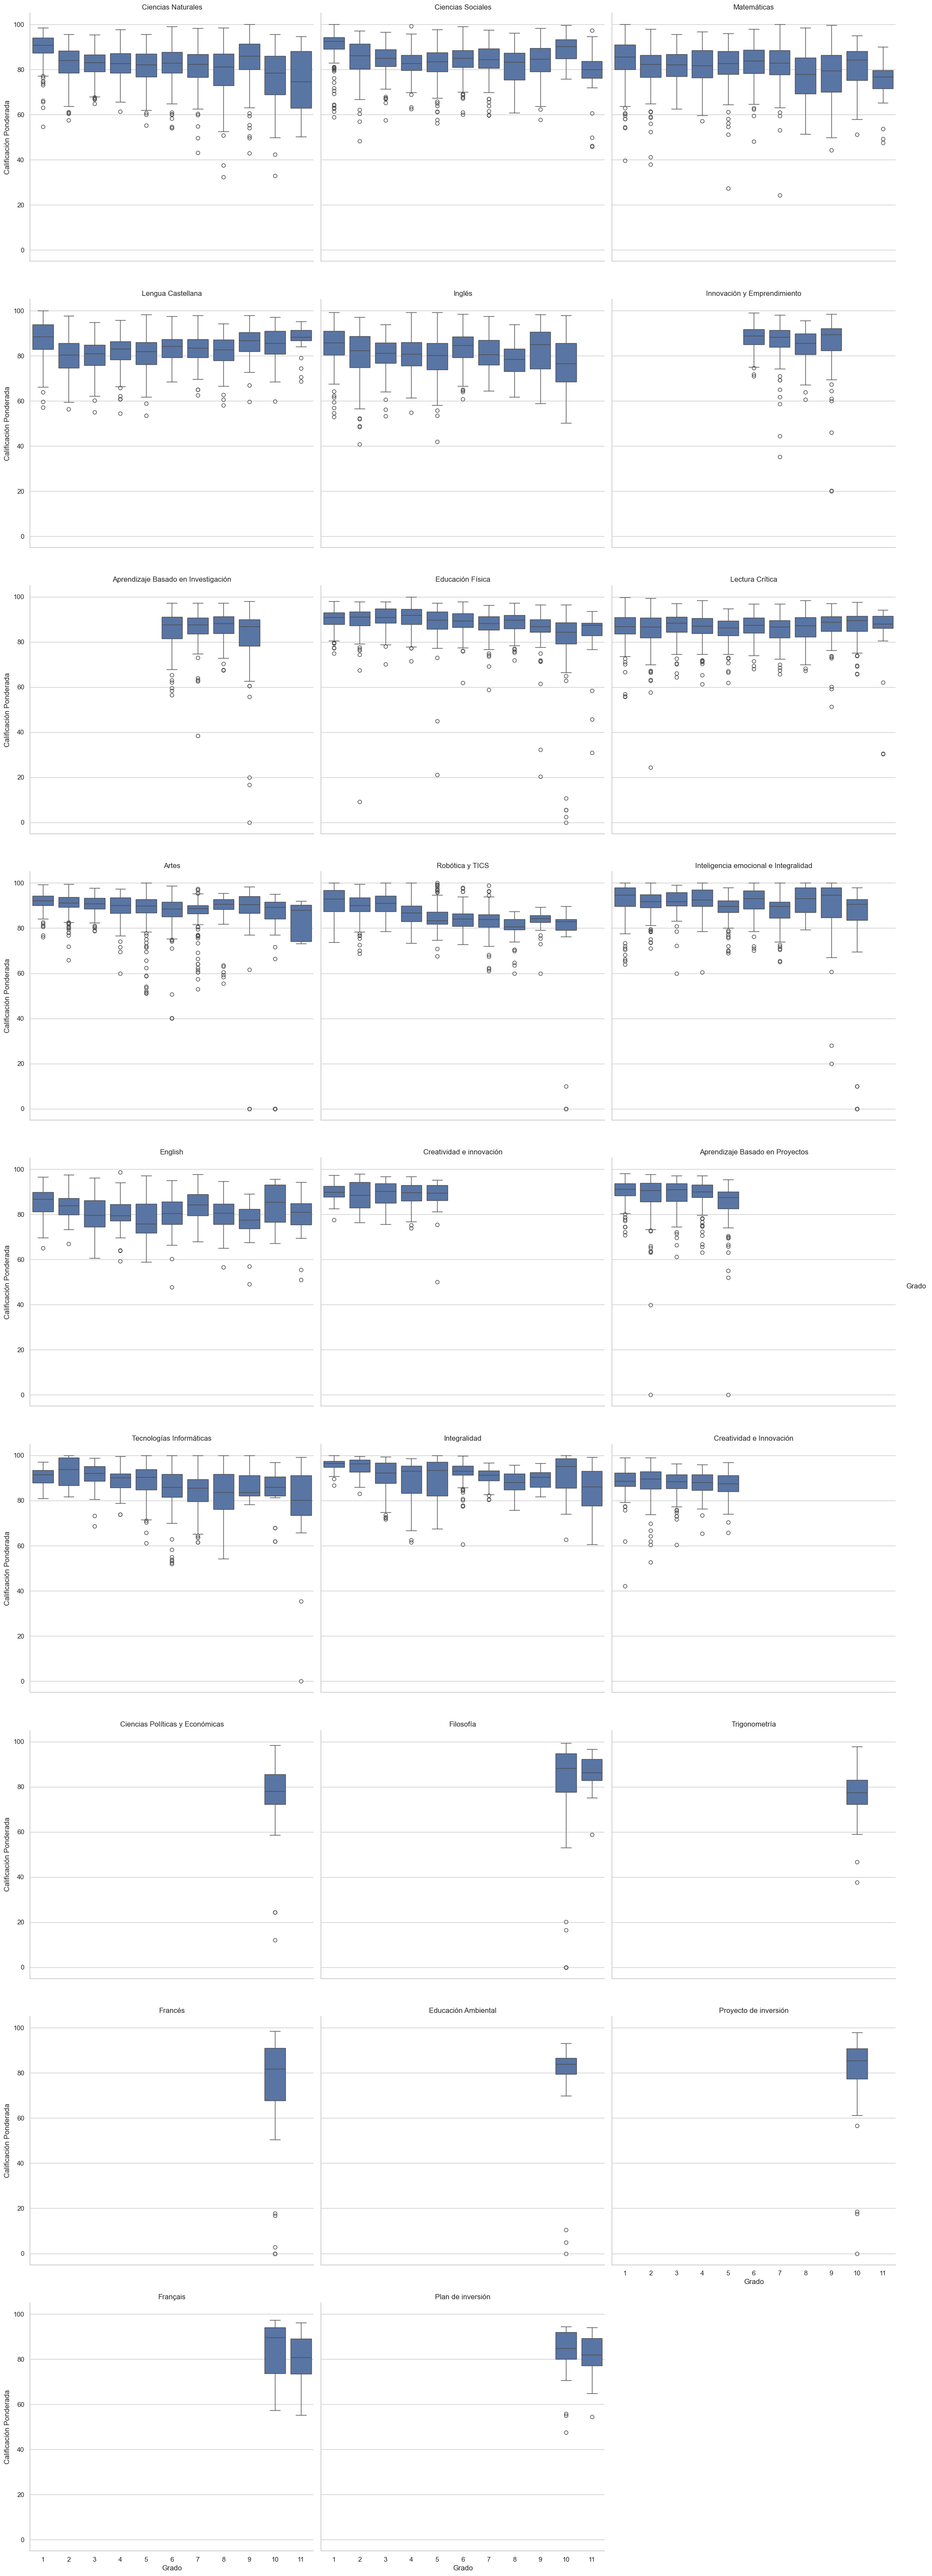

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un FacetGrid para generar un gráfico por cada grado
g = sns.FacetGrid(calificaciones_df_trans, col='Asignatura', col_wrap=3, height=5, aspect=1.5)

# Mapear el boxplot a cada subgráfico
g.map(sns.boxplot, 'Grado', 'Calificacion_Ponderada')

# Configurar los títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("Grado", "Calificación Ponderada")

# Ajustar el diseño para dar espacio a las etiquetas
plt.subplots_adjust(top=1.5, bottom=0.2, right=0.85, left=0.1)

# Agregar la leyenda
g.add_legend(title='Grado')

# Mostrar el gráfico
plt.show()


#### Separación de datos por sede 

In [20]:
calificaciones_df_fusa=calificaciones_df_trans.loc[calificaciones_df_trans['Sede'] == 'Fusagasugá']
calificaciones_df_girardot=calificaciones_df_trans.loc[calificaciones_df_trans['Sede'] == 'Girardot']

### Estadísticas Descriptivas por sede

Estadísticas descriptivas sobre las columnas numéricas del df

In [260]:
print('Analitica descritiva de Fusafasugá')
calificaciones_df_fusa.describe()

Analitica descritiva de Fusafasugá


,Grado,Intensidad Horaria,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada
count,14369.000000,14369.000000,14369.000000,14369.00000,14369.000000,14369.000000,14369.000000
mean,5.482845,2.764911,84.004524,83.78899,88.338576,90.580973,85.464319
std,2.889121,1.539971,11.191635,11.60748,10.648880,9.733032,9.934265
min,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,79.000000,79.00000,85.000000,89.000000,81.300000
50%,5.000000,3.000000,86.000000,87.00000,90.000000,92.000000,87.300000
75%,8.000000,4.000000,92.000000,92.00000,95.000000,95.000000,91.900000
max,11.000000,7.000000,100.000000,100.00000,100.000000,100.000000,100.000000


In [261]:
print('Analitica descritiva de Girardot')
calificaciones_df_girardot.describe()

Analitica descritiva de Girardot


,Grado,Intensidad Horaria,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada
count,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000
mean,4.245440,2.724336,84.195414,83.997004,88.608390,89.634575,85.562402
std,2.062464,1.467773,8.680450,8.855915,7.936103,7.277863,7.320452
min,1.000000,1.000000,26.000000,25.000000,0.000000,0.000000,21.200000
25%,3.000000,1.000000,80.000000,80.000000,85.000000,87.000000,81.900000
50%,4.000000,3.000000,86.000000,86.000000,90.000000,90.000000,86.700000
75%,6.000000,4.000000,90.000000,90.000000,94.000000,95.000000,90.500000
max,8.000000,7.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Generación gráfico histograma para entendimiento inicial de los datos por sede

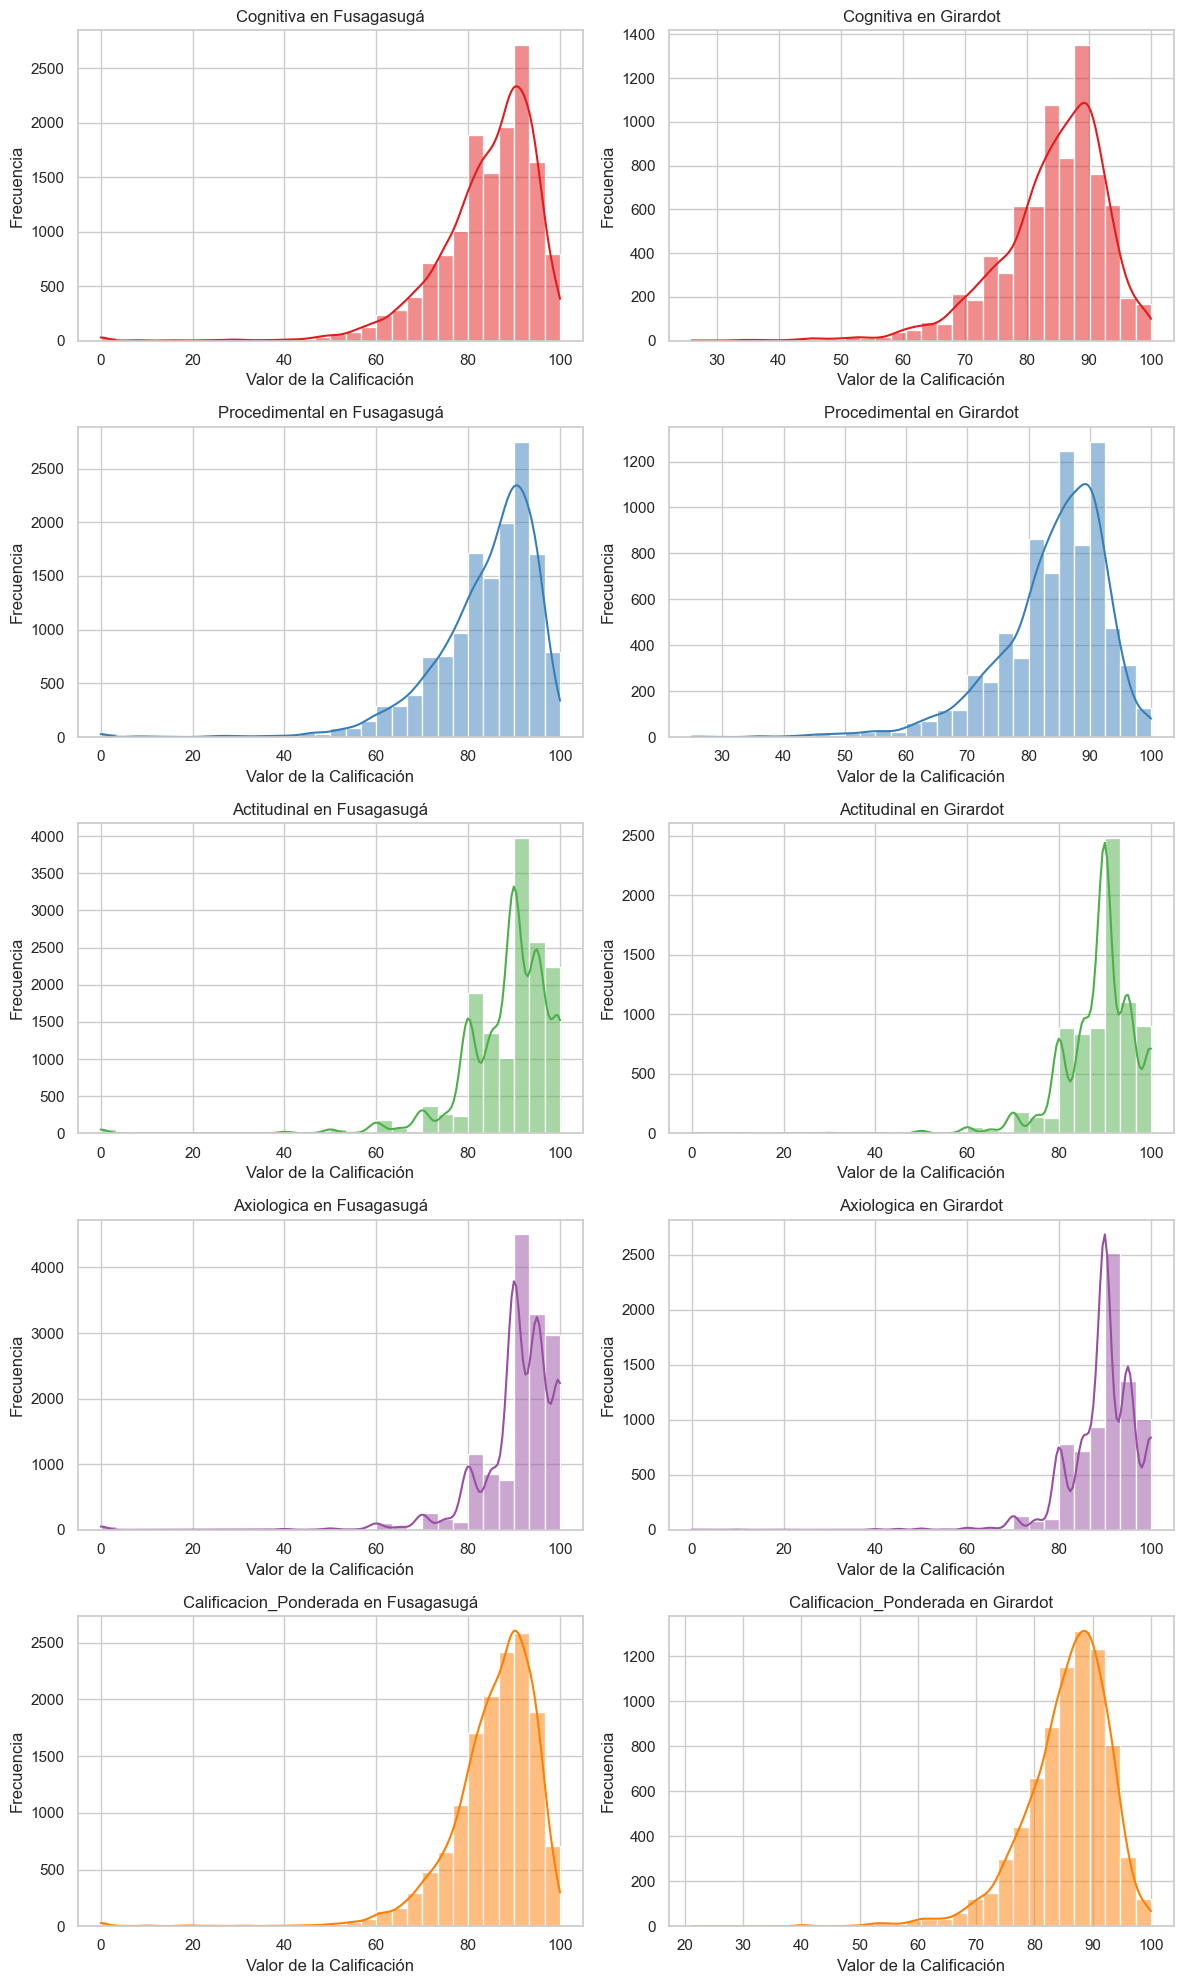

In [263]:
def plot_histograms_side_by_side(df1, df2, columnas, location1, location2, palette):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))
    
    for i, columna in enumerate(columnas):
        # Gráfico para la primera ubicación (e.g., Fusagasugá)
        sns.histplot(df1[columna], bins=30, kde=True, ax=axes[i, 0], color=palette[i])
        axes[i, 0].set_title(f'{columna} en {location1}')
        axes[i, 0].set_xlabel('Valor de la Calificación')
        axes[i, 0].set_ylabel('Frecuencia')
        
        # Gráfico para la segunda ubicación (e.g., Girardot)
        sns.histplot(df2[columna], bins=30, kde=True, ax=axes[i, 1], color=palette[i])
        axes[i, 1].set_title(f'{columna} en {location2}')
        axes[i, 1].set_xlabel('Valor de la Calificación')
        axes[i, 1].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

# Lista de columnas y paleta de colores
columnas = ['Cognitiva', 'Procedimental', 'Actitudinal', 'Axiologica','Calificacion_Ponderada']
paleta = sns.color_palette("Set1", len(columnas))

# Generar gráficos lado a lado para Fusagasugá y Girardot
plot_histograms_side_by_side(calificaciones_df_fusa, calificaciones_df_girardot, columnas, 'Fusagasugá', 'Girardot', paleta)

### Generación gráfico boxplot para entendimiento inicial de los datos atípicos

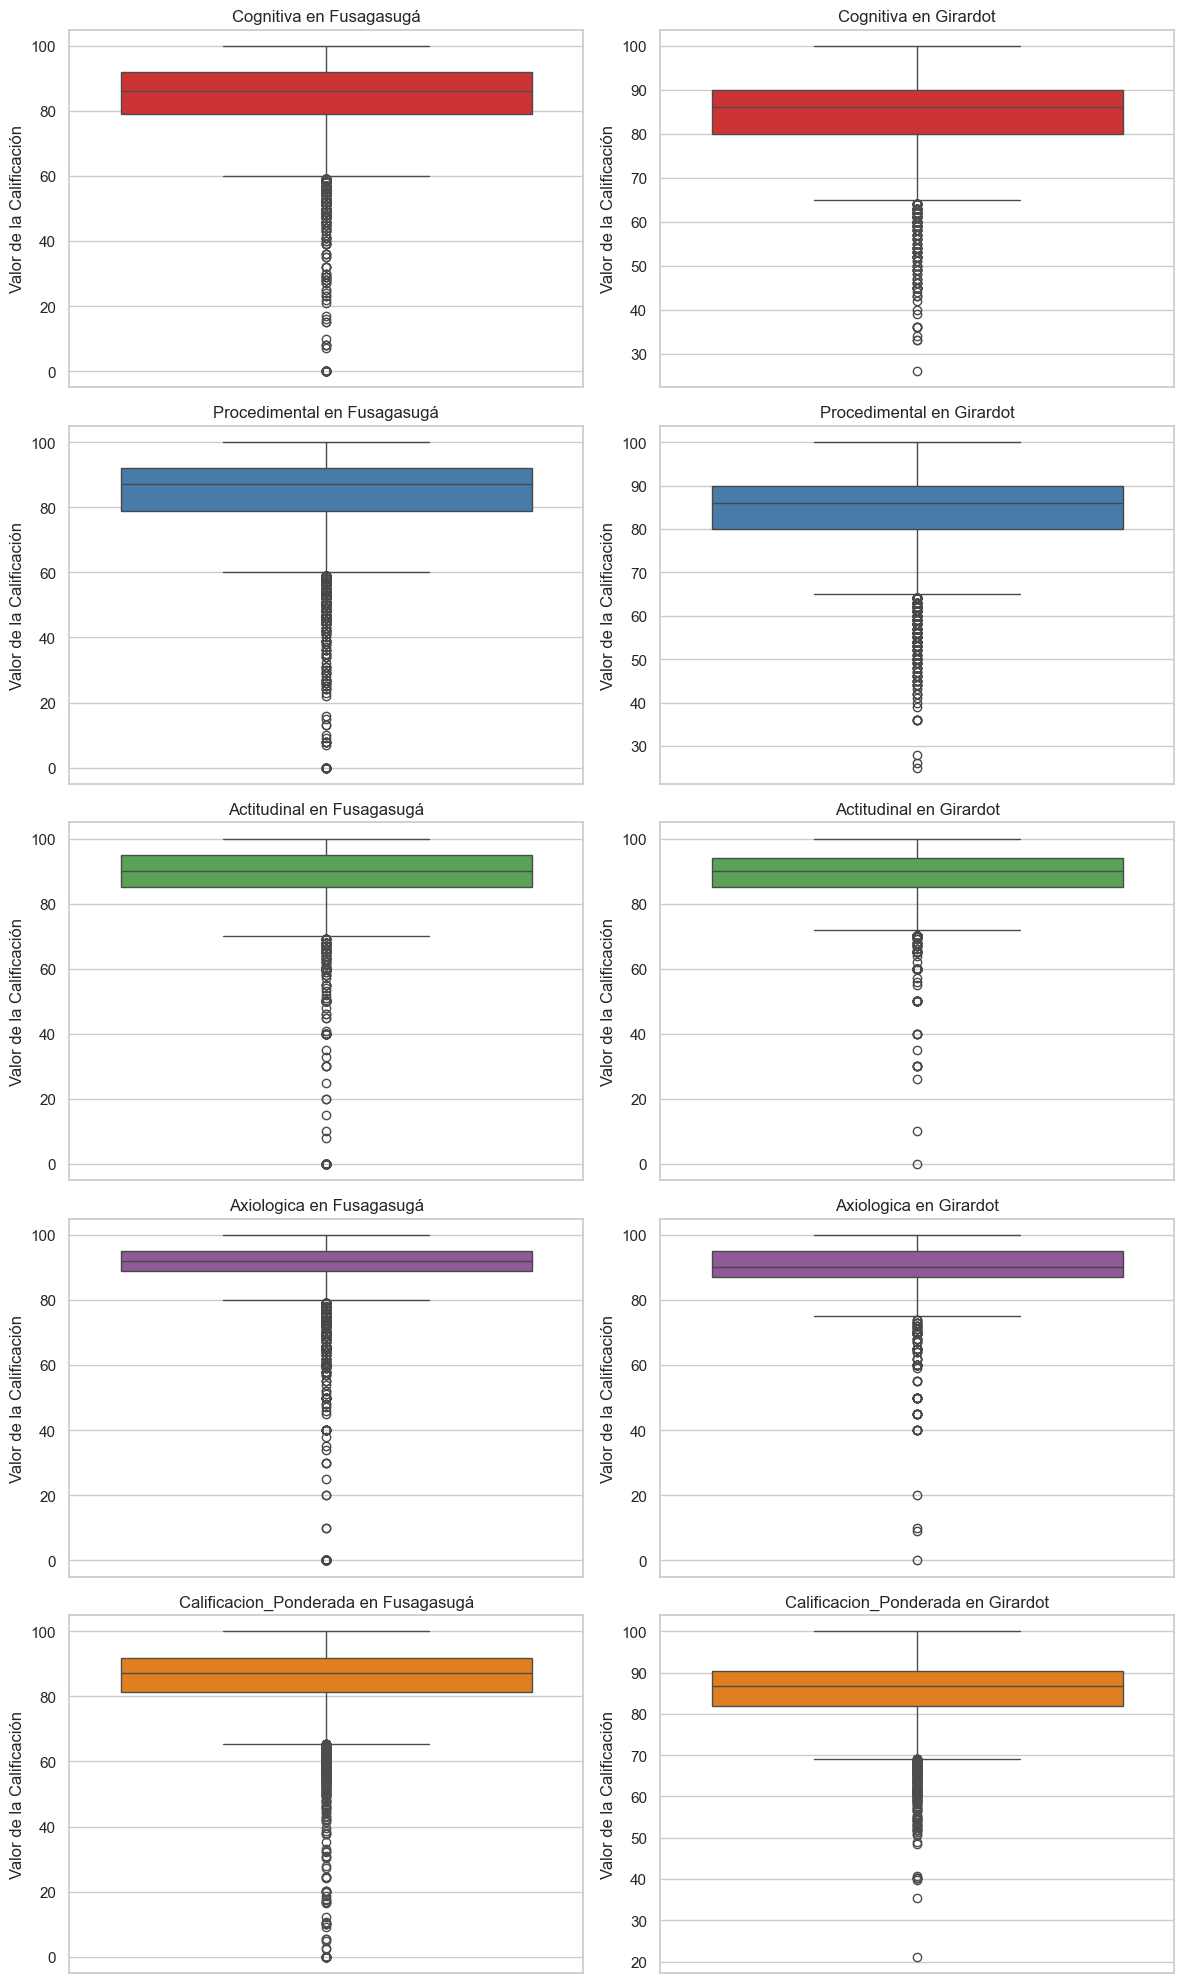

In [265]:
def plot_boxplots_side_by_side(df1, df2, columnas, location1, location2, palette):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))
    
    for i, columna in enumerate(columnas):
        # Boxplot para la primera ubicación (e.g., Fusagasugá)
        sns.boxplot(y=df1[columna], ax=axes[i, 0], color=palette[i])
        axes[i, 0].set_title(f'{columna} en {location1}')
        axes[i, 0].set_ylabel('Valor de la Calificación')
        axes[i, 0].set_xlabel('')

        # Boxplot para la segunda ubicación (e.g., Girardot)
        sns.boxplot(y=df2[columna], ax=axes[i, 1], color=palette[i])
        axes[i, 1].set_title(f'{columna} en {location2}')
        axes[i, 1].set_ylabel('Valor de la Calificación')
        axes[i, 1].set_xlabel('')
    
    plt.tight_layout()
    plt.show()

# Lista de columnas y paleta de colores
columnas = ['Cognitiva', 'Procedimental', 'Actitudinal', 'Axiologica','Calificacion_Ponderada']
paleta = sns.color_palette("Set1", len(columnas))

# Generar gráficos de boxplot lado a lado para Fusagasugá y Girardot
plot_boxplots_side_by_side(calificaciones_df_fusa, calificaciones_df_girardot, columnas, 'Fusagasugá', 'Girardot', paleta)


###  Distribución de estudiantes por sede

C:\Users\Cathe\AppData\Local\Temp\ipykernel_26416\2489709455.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sede', data=calificaciones_df_trans, palette=palette)
C:\Users\Cathe\AppData\Local\Temp\ipykernel_26416\2489709455.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Sede', data=calificaciones_df_trans, palette=palette)


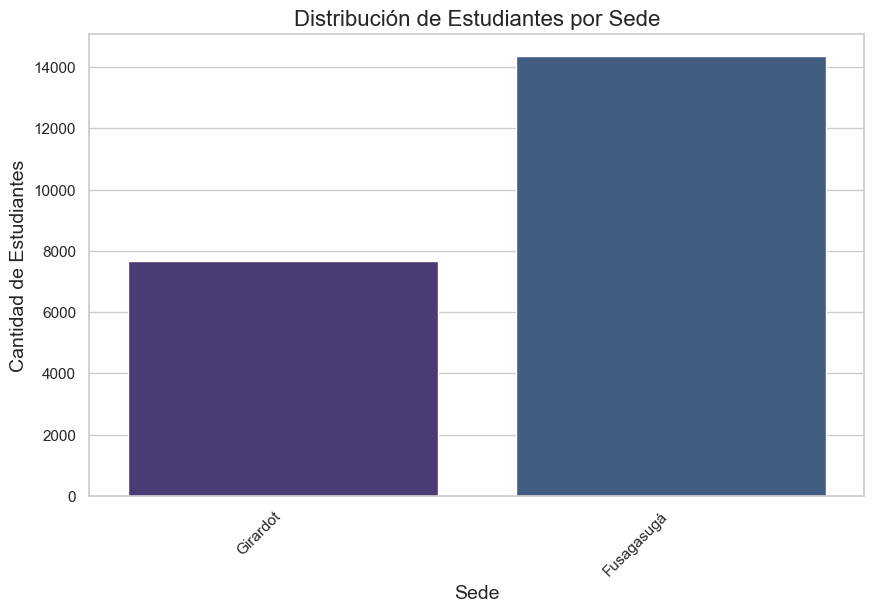

In [266]:

# Configuración de estilo y paleta de colores
sns.set(style="whitegrid")
palette = sns.color_palette("viridis")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Sede', data=calificaciones_df_trans, palette=palette)

plt.title('Distribución de Estudiantes por Sede', fontsize=16)
plt.xlabel('Sede', fontsize=14)
plt.ylabel('Cantidad de Estudiantes', fontsize=14)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right')

plt.show()


### Distribución de estudiantes por sede y grado

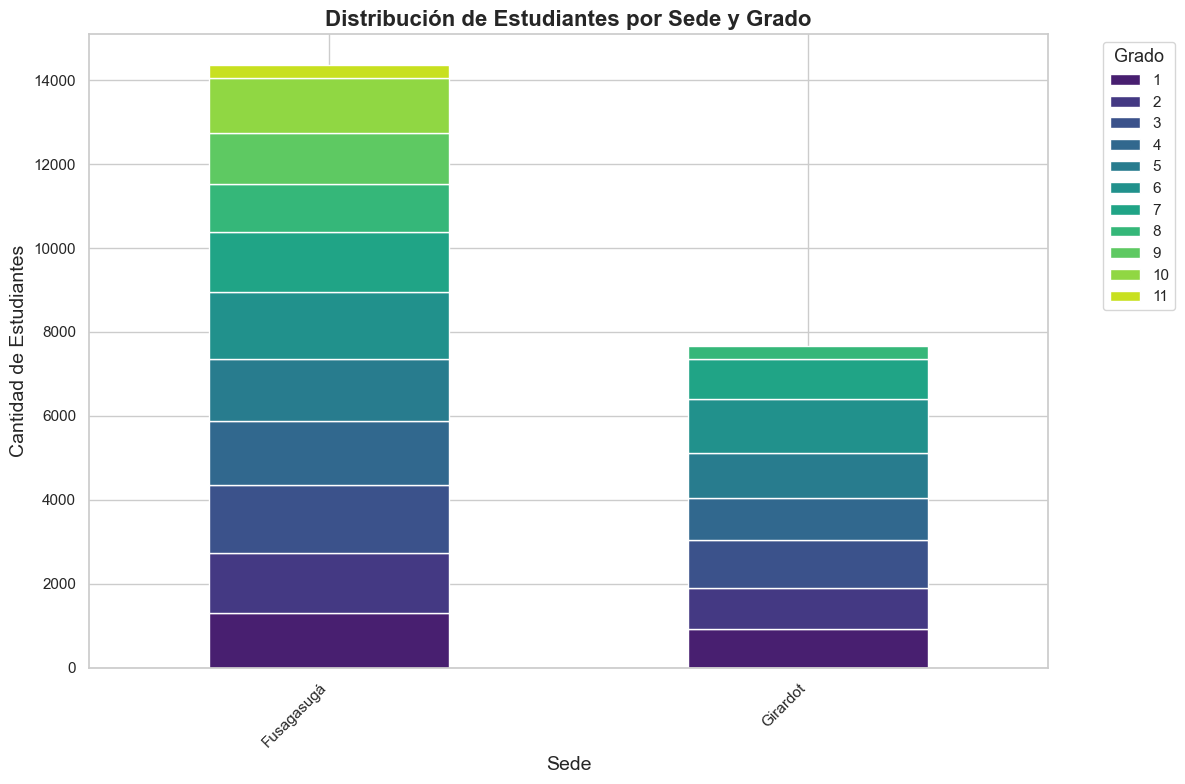

In [267]:

# Contar la cantidad de estudiantes por sede y grado
crosstab = pd.crosstab(calificaciones_df_trans['Sede'], calificaciones_df_trans['Grado'])

# Configuración de estilo y paleta de colores
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(crosstab.columns))

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Plotear el gráfico con matplotlib
crosstab.plot(kind='bar', stacked=True, ax=ax, color=palette)

# Personalización del gráfico
plt.title('Distribución de Estudiantes por Sede y Grado', fontsize=16, weight='bold')
plt.xlabel('Sede', fontsize=14)
plt.ylabel('Cantidad de Estudiantes', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.legend(title='Grado', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el espacio para la leyenda
plt.tight_layout()

plt.show()


## Análisis variable Obejtivo: calificaciones

### Matriz de correlación

Matriz de Correlación incluyendo Intensidad Horaria:
               Cognitiva  Procedimental  Actitudinal  Axiologica
Cognitiva       1.000000       0.937983     0.563774    0.489732
Procedimental   0.937983       1.000000     0.581710    0.490943
Actitudinal     0.563774       0.581710     1.000000    0.753637
Axiologica      0.489732       0.490943     0.753637    1.000000


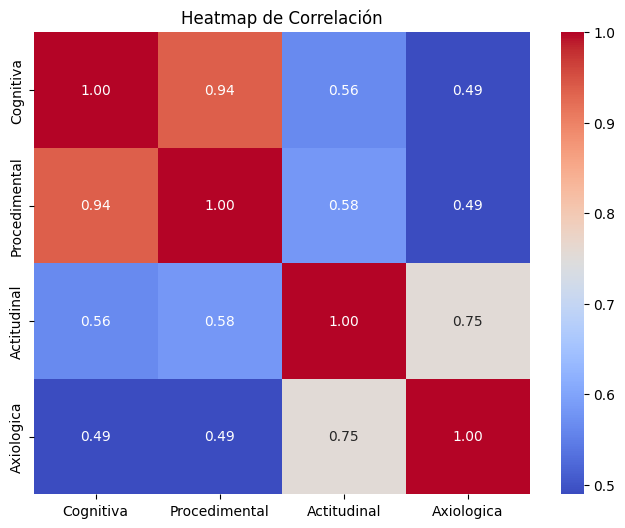

In [46]:
columns_of_interest = ['Cognitiva', 'Procedimental', 'Actitudinal', 'Axiologica']

# Calcular la matriz de correlación
correlacion_con_intensidad = calificaciones_df_trans[columns_of_interest].corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación incluyendo Intensidad Horaria:")
print(correlacion_con_intensidad)

# Visualización de la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlacion_con_intensidad, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación')
plt.show()

- Cognitiva y Procedimental (0.94): Existe una correlación muy alta entre las calificaciones Cognitivas y Procedimentales. Esto indica que los estudiantes que obtienen buenas calificaciones en aspectos Cognitivos tienden a obtener también buenas calificaciones en aspectos Procedimentales. La correlación cercana a 1 sugiere que estas dos dimensiones están fuertemente relacionadas.
- Cognitiva y Actitudinal (0.56): La correlación moderada entre Cognitiva y Actitudinal indica que hay una relación positiva, pero no tan fuerte como la que se observa entre Cognitiva y Procedimental.
- Cognitiva y Axiológica (0.49): La correlación entre Cognitiva y Axiológica es moderada, lo que sugiere que los valores y principios (dimensión Axiológica) tienen una relación menos fuerte con el rendimiento cognitivo que las habilidades procedimentales.
- Procedimental y Actitudinal (0.58): La relación entre Procedimental y Actitudinal también es moderada, similar a la relación entre Cognitiva y Actitudinal.
- Actitudinal y Axiológica (0.75): Esta correlación es bastante alta, lo que sugiere que las actitudes de los estudiantes están fuertemente relacionadas con sus valores y principios.
- Procedimental y Axiológica (0.49): Similar a la correlación entre Cognitiva y Axiológica, la relación es moderada, indicando que los aspectos procedimentales y axiológicos no están tan estrechamente vinculados.

In [44]:
# Crear un diccionario para mapear las asignaturas a las nuevas categorías generales
asignaturas_a_grupo = {
    'Educación Física': 'Artes y Educación Física',
    'Artes': 'Artes y Educación Física',
    'Educación Ambiental': 'Artes y Educación Física',
    'Lengua Castellana': 'Lengua y Humanidades',
    'Lectura Crítica': 'Lengua y Humanidades',
    'Inglés': 'Lengua y Humanidades',
    'English': 'Lengua y Humanidades',
    'Francés': 'Lengua y Humanidades',
    'Français': 'Lengua y Humanidades',
    'Filosofía': 'Lengua y Humanidades',
    'Ciencias Sociales': 'Lengua y Humanidades',
    'Ciencias Políticas y Económicas': 'Lengua y Humanidades',
    'Ciencias Naturales': 'Ciencias y Matemáticas',
    'Matemáticas': 'Ciencias y Matemáticas',
    'Trigonometría': 'Ciencias y Matemáticas',
    'Robótica y TICS': 'Tecnología e Innovación',
    'Tecnologías Informáticas': 'Tecnología e Innovación',
    'Creatividad e Innovación': 'Tecnología e Innovación',
    'Innovación y Emprendimiento': 'Tecnología e Innovación',
    'Creatividad e innovación': 'Tecnología e Innovación',
    'Aprendizaje Basado en Proyectos': 'Proyectos y Aprendizaje Integral',
    'Aprendizaje Basado en Investigación': 'Proyectos y Aprendizaje Integral',
    'Proyecto de inversión': 'Proyectos y Aprendizaje Integral',
    'Plan de inversión': 'Proyectos y Aprendizaje Integral',
    'Integralidad': 'Proyectos y Aprendizaje Integral',
    'Inteligencia emocional e Integralidad': 'Proyectos y Aprendizaje Integral'
}

# Aplicar la agrupación a la columna 'Asignatura' en el DataFrame
calificaciones_df_trans['Grupo Asignatura'] = calificaciones_df_trans['Asignatura'].map(asignaturas_a_grupo)

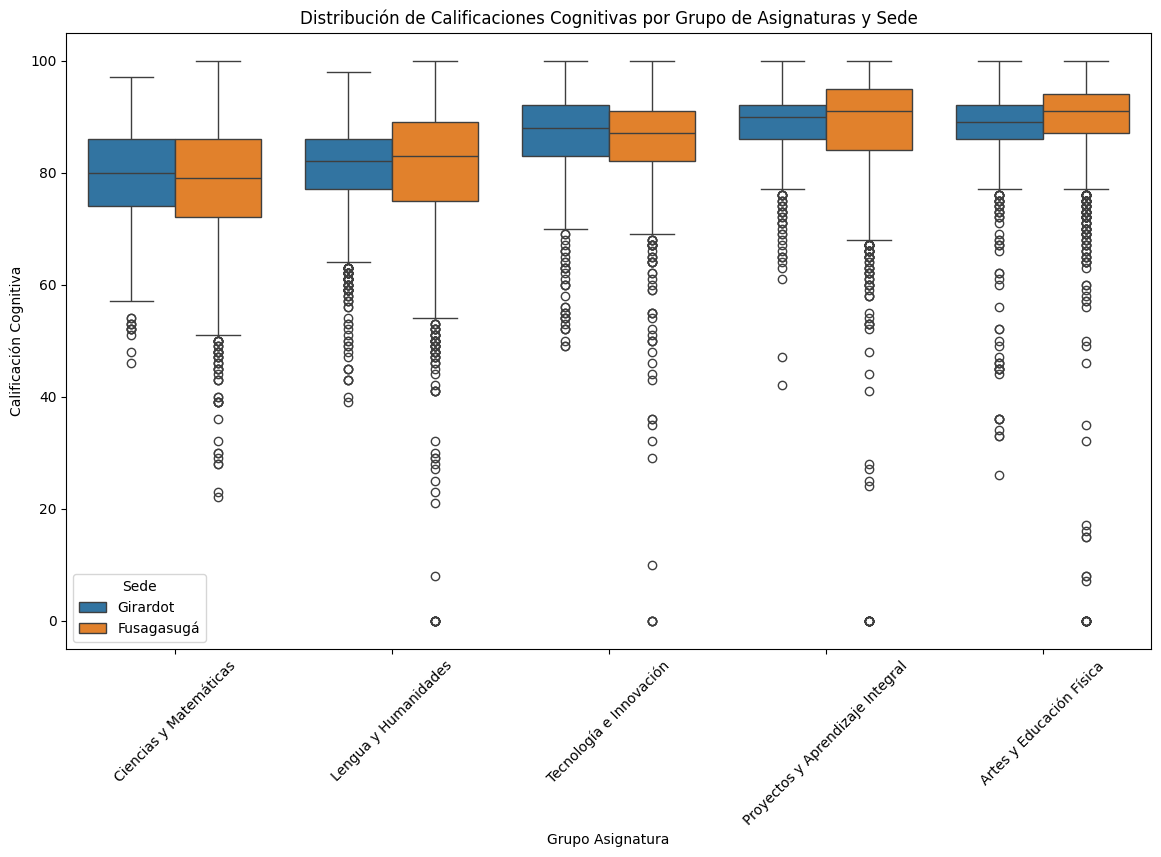

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico combinado para Fusagasugá y Girardot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Grupo Asignatura', y='Cognitiva', hue='Sede', data=calificaciones_df_trans)
plt.title('Distribución de Calificaciones Cognitivas por Grupo de Asignaturas y Sede')
plt.xlabel('Grupo Asignatura')
plt.ylabel('Calificación Cognitiva')
plt.xticks(rotation=45)
plt.legend(title='Sede')
plt.show()

En general, no hay diferencias drásticas entre las sedes, lo que sugiere que ambas están ofreciendo un nivel de enseñanza relativamente consistente en todas las áreas.

En el grupo de asignaturas **Ciencias y Matemáticas** se muestra una distribución de calificaciones bastante compacta, pero con algunos valores atípicos en la parte inferior, lo que sugiere que, aunque la mayoría de los estudiantes tienen un rendimiento similar, hay algunos que están luchando significativamente.



## Pre procesamiento


##### 1. Variables Objetivo y Características 
- **Variables objetivo (target)**: predecir el rendimiento por grado por materia,  usando cada una de las calificaciones (Cognitiva, Procedimental, Actitudinal, Axiologica) como variable objetivo.
- **Características (features)**: Las demás columnas se utilizarán como características para predecir la variable objetivo.

##### 2. Tipos de Variables: 
- **Variables categóricas**: Sede, Estudiante, Grado, Grupo, Periodo, Año, Asignatura.
- **Variables numéricas**: Intensidad Horaria, Cognitiva, Procedimental, Actitudinal, Axiologica.

In [268]:

calificaciones_df_fusa.to_csv('calificaciones_to_model_fusa.csv', index=False)

calificaciones_df_girardot.to_csv('calificaciones_to_model_girardot.csv', index=False)